In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [104]:
train = pd.read_csv('seaborn-data/titanic.csv')

In [105]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


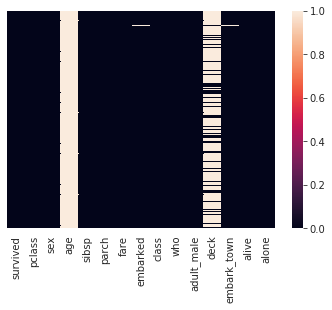

In [49]:
sns.heatmap(train.isnull(),yticklabels=False)

In [12]:
train.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


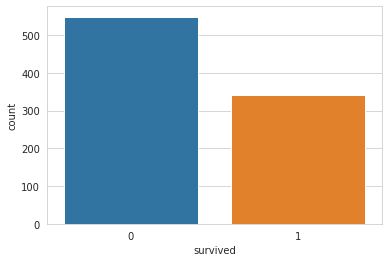

In [24]:
sns.countplot(x='survived',data=train)

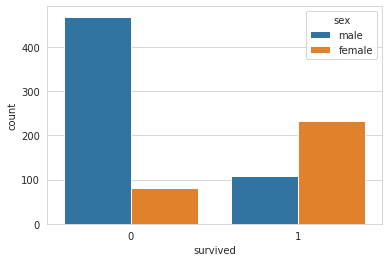

In [25]:
sns.countplot(x='survived',hue='sex',data=train)  #hue will give subset of coloumn let us say in case of sex it will give you male and female

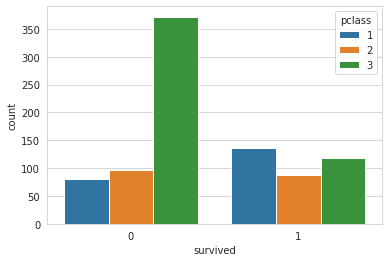

In [28]:
sns.countplot(x='survived',hue='pclass',data=train)

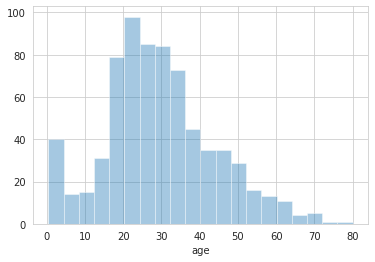

In [38]:
sns.distplot(train['age'].dropna(),kde=False,bins=20) #this will drop all NAN values from age coloumn
#histogram will tell you how many number of people are present in particular age group
#to check the distribution we can go by distplot or hist which by default seaborn functions

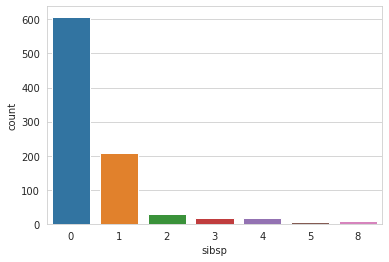

In [39]:
sns.countplot(x='sibsp',data=train)

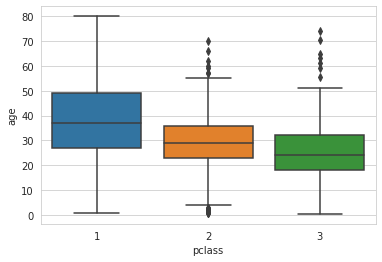

In [42]:
sns.boxplot(x='pclass',y='age',data=train)

In [60]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if(pd.isnull(age)):
        if(pclass==1):
            return 38
        elif(pclass==2):
            return 29
        elif(pclass==3):
            return 25
    else:
        return age

In [106]:
train['age'] = train[['age','pclass']].apply(impute_age,axis=1)

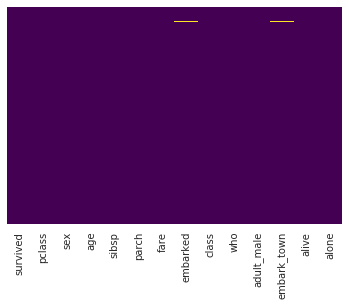

In [73]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
train.drop('deck',axis=1,inplace=True) #inplace=True will drop the 'deck' coloumn from 'train' dataset and by default it is False 
#value means when it is false it will only print the dataset wil dropped coloumn bt not affected to original dataset inplace=True make changes in original dataset

In [108]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,25.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [109]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [82]:
# to apply any algo to our model we have to handle some of the values which are present in the categorical form in dataset
# in above dataset there are two coloums which has categorical values like 'sex' coloum and 'embarked' coloumn, so will handle those
# values using numpy which shown below

In [84]:
pd.get_dummies(train['embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [85]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,25,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,25,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,38,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,25,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,29,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,38,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,25,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,38,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [110]:
sex = pd.get_dummies(train['sex'],drop_first=True)
embark = pd.get_dummies(train['embarked'],drop_first=True)

In [111]:
train.drop(['sex','embarked'],axis=1,inplace=True) 

In [112]:
train.drop('embark_town',axis=1,inplace=True)

In [96]:
train

,survived,pclass,age,sibsp,parch,class,who,adult_male,alive,alone
0,0,3,25,1,0,Third,man,True,no,False
1,1,1,38,1,0,First,woman,False,yes,False
2,1,3,25,0,0,Third,woman,False,yes,True
3,1,1,38,1,0,First,woman,False,yes,False
4,0,3,25,0,0,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,29,0,0,Second,man,True,no,True
887,1,1,38,0,0,First,woman,False,yes,True
888,0,3,25,1,2,Third,woman,False,no,False
889,1,1,38,0,0,First,man,True,yes,True


In [113]:
train=pd.concat([train,sex,embark],axis=1)

In [100]:
train

,survived,pclass,age,sibsp,parch,class,who,adult_male,alive,alone,male,Q,S
0,0,3,25,1,0,Third,man,True,no,False,1,0,1
1,1,1,38,1,0,First,woman,False,yes,False,0,0,0
2,1,3,25,0,0,Third,woman,False,yes,True,0,0,1
3,1,1,38,1,0,First,woman,False,yes,False,0,0,1
4,0,3,25,0,0,Third,man,True,no,True,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,29,0,0,Second,man,True,no,True,1,0,1
887,1,1,38,0,0,First,woman,False,yes,True,0,0,1
888,0,3,25,1,2,Third,woman,False,no,False,0,0,1
889,1,1,38,0,0,First,man,True,yes,True,1,0,0


In [114]:
train.drop(['class','who','adult_male','alive','alone'],axis=1,inplace=True)

In [115]:
train

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [117]:
train.drop('survived',axis=1).head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [118]:
train['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [119]:
 from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('survived',axis=1),
                                                train['survived'],test_size=0.30,
                                                random_state=101) #0.30 means 30% of my train data

In [122]:
from sklearn.linear_model import LogisticRegression

In [125]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/home/amit/python_programs/.venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
predictions = logmodel.predict(x_test)

In [127]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [131]:
accuracy = confusion_matrix(predictions,y_test)

In [132]:
accuracy

array([[133,  38],
       [ 21,  76]])

In [134]:
accuracy = accuracy_score(y_test,predictions)

In [135]:
accuracy

0.7798507462686567